<a href="https://colab.research.google.com/github/yasirijazgoraya/TextUtils/blob/master/social_distance_with_zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall torchvision
!pip install torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html

Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/torchvision-0.10.0+cu102.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libcudart.459720b2.so.10.2
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libnvjpeg.a6b52b54.so.10
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libpng16.7f72a3c5.so.16
    /usr/local/lib/python3.7/dist-packages/torchvision.libs/libz.1328edc3.so.1
    /usr/local/lib/python3.7/dist-packages/torchvision/*
Proceed (y/n)? y
  Successfully uninstalled torchvision-0.10.0+cu102
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 8.8 MB 3.0 MB/s 
     |████████████████████████████████| 663.1 MB 1.3 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
 

In [ ]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
#torch._version_

     |████████████████████████████████| 831.4 MB 2.4 kB/s 
     |████████████████████████████████| 22.1 MB 54 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.2.0+cu92
    Uninstalling torch-1.2.0+cu92:
      Successfully uninstalled torch-1.2.0+cu92
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.4.0+cu92
    Uninstalling torchvision-0.4.0+cu92:
      Successfully uninstalled torchvision-0.4.0+cu92
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-plog5z3i
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-plog5z3i
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=64542 sha256=ac1a217aa895bd312b48b5176c00c1387e9f18eb9260d9e1fe4c1c4605720c6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-4qxbvsuv/wheels/24/1d/09/8167de727fe5b74f832b6fcb5d9069d8f03ca29f337bfe484d
Successfully built fvcore
  Attempting uninstall: fvcore
    Fou

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 12917, done.
remote: Counting objects: 100% (418/418), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 12917 (delta 218), reused 320 (delta 168), pack-reused 12499
Receiving objects: 100% (12917/12917), 5.54 MiB | 11.58 MiB/s, done.
Resolving deltas: 100% (9178/9178), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 49 kB 2.3 MB/s 
     |████████████████████████████████| 74 kB 2.8 MB/s 
     |████████████████████████████████| 145 kB 37.7 MB/s 
     |████████████████████████████████| 130 kB 43.6 MB/s 
     |████████████████████████████████| 743 kB 46.1 MB/s 
     |████████████████████████████████| 747 kB 35.0 MB/s 
     |████████████████████████████████| 636 kB 42.5 MB/s 
     |████████████████████████████████| 112 kB 53.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210825-py3-none-any.whl size=60661 sha256=6208fb650d70503c3ba65bf72d17fb5bb666116

In [ ]:
import detectron2

In [ ]:
from detectron2 import model_zoo

In [ ]:
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog


In [ ]:
%%time
!rm -r frames/*
!mkdir frames/

#specify path to video
video = "/content/drive/MyDrive/Datasets/abc.avi"

#capture video
cap = cv2.VideoCapture(video)
cnt=0

# Check if video file is opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

#Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

    #save each frame to folder        
    cv2.imwrite('frames/'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  # Break the loop
  else: 
    break

rm: cannot remove 'frames/*': No such file or directory
CPU times: user 17 s, sys: 730 ms, total: 17.7 s
Wall time: 19.3 s


In [ ]:
#frame rate of a video
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

25.0


In [ ]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)


model_final_f97cb7.pkl: 136MB [00:14, 9.35MB/s]                           


In [ ]:
#read an image
img = cv2.imread("frames/10.png")

#pass to the model
outputs = predictor(img)

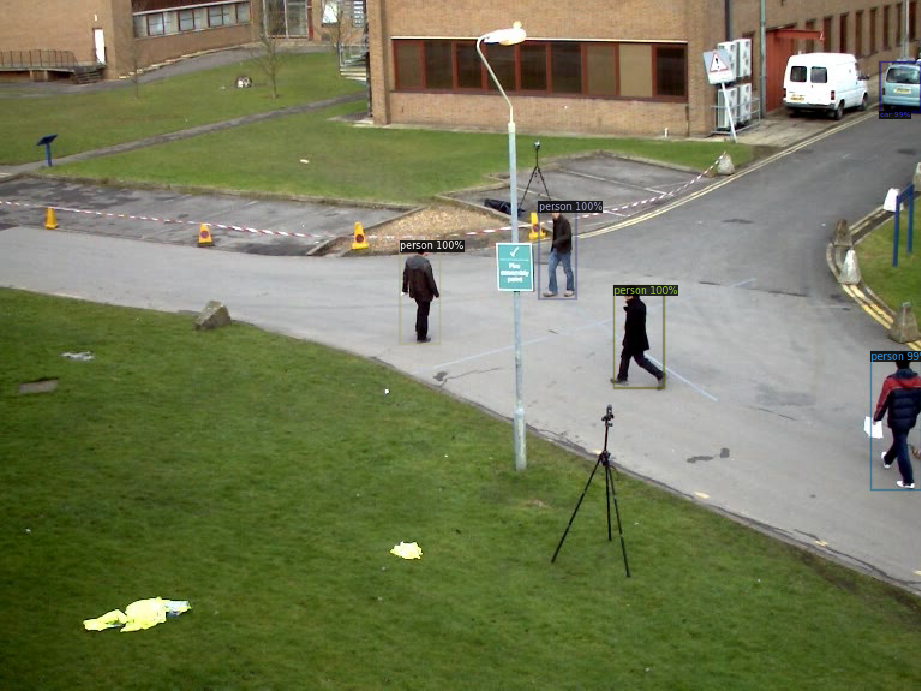

In [ ]:
# Use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[0 0 0 0 2]


In [ ]:

bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[511.63684  238.33398  553.0383   323.54742 ]
 [333.68405  200.86627  366.40375  286.75208 ]
 [449.1411   168.61452  479.69693  249.20724 ]
 [725.9673   293.26584  768.       408.41113 ]
 [732.9224    52.002647 767.61774   93.543976]]


In [ ]:

#identity only persons 
ind = np.where(classes==0)[0]

#identify bounding box of only persons
person=bbox[ind]

#total no. of persons
num= len(person)

In [ ]:
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

511.63684 238.33398 553.0383 323.54742


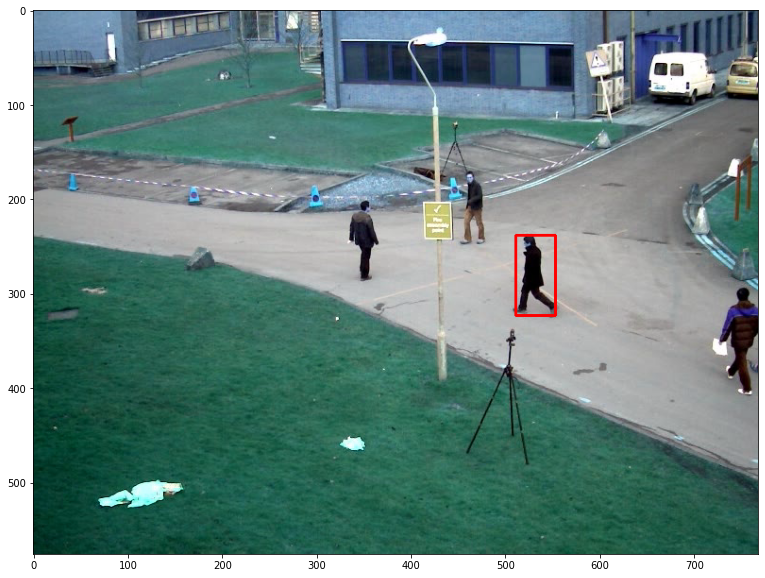

In [ ]:
img = cv2.imread('frames/10.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

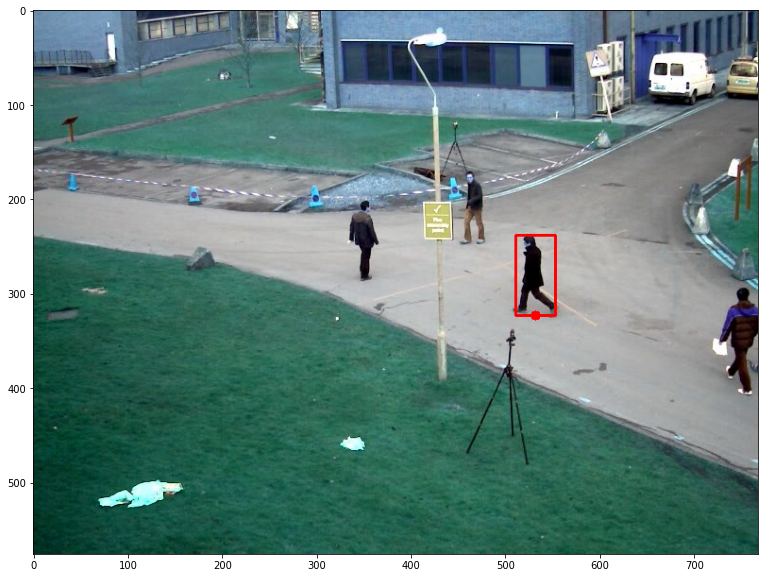

In [ ]:
#compute center 
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)
plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
#define a function which return the bottom center of every bbox
def mid_point(img,person,idx):
  #get the coordinates
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  #compute bottom center of bbox
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

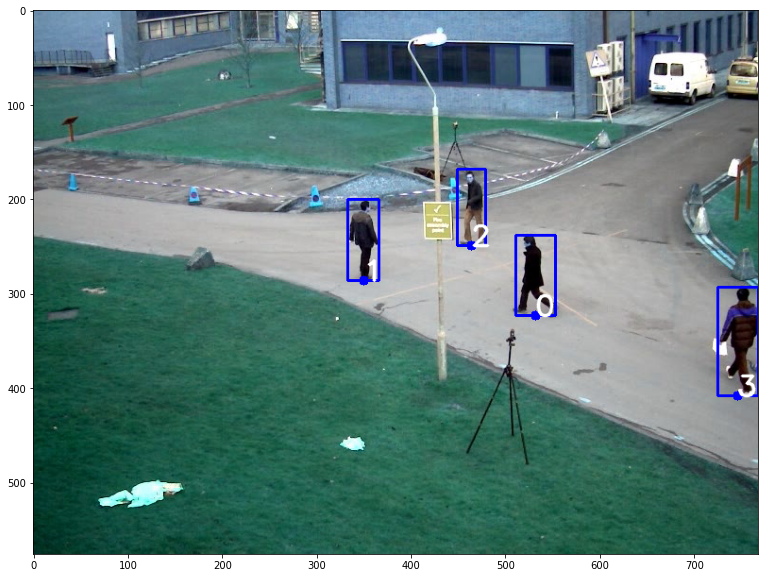

In [ ]:
#call the function
midpoints = [mid_point(img,person,i) for i in range(len(person))]

#visualize image
plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 13.4 µs


In [ ]:
dist= compute_distance(midpoints,num)

In [ ]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs


In [ ]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

,p1,p2,dist


In [ ]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

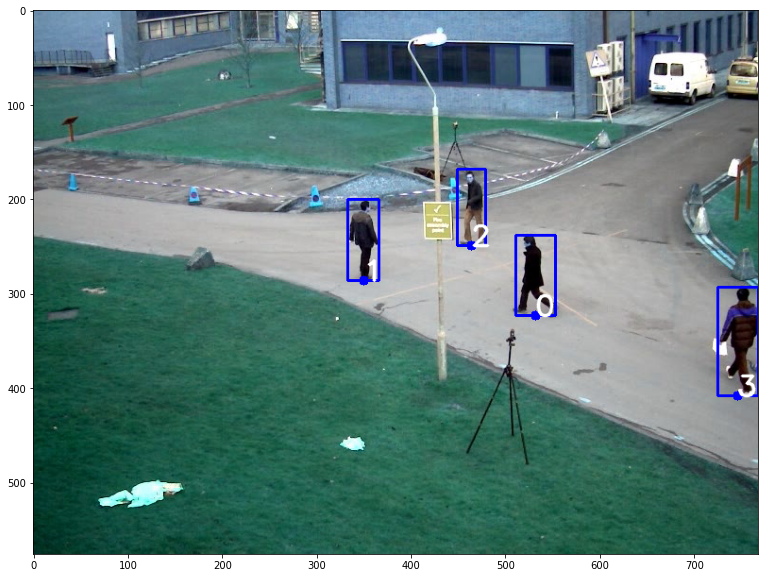

In [ ]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:

import os
import re

names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
def find_closest_people(name,thresh):

  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames/'+name,img)
  return 0


In [ ]:
from tqdm import tqdm
thresh=100
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 697/697 [12:34<00:00,  1.08s/it]


In [ ]:
%%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    #reading each files
    img = cv2.imread('frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()


CPU times: user 11.3 s, sys: 610 ms, total: 11.9 s
Wall time: 11.6 s
